<a href="https://colab.research.google.com/github/ababayato/Hamoye-Stage-C-Quiz/blob/main/Stage_C_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning: Classification <br>
By Adedamola Babayato <br>
ID: 157372abee81f000

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# For data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For modelling
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import lightgbm as ltb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

warnings.filterwarnings('ignore')

Import Dataset

In [ ]:
url = "https://raw.githubusercontent.com/ababayato/Hamoye-Stage-C-Quiz/main/Data_for_UCI_named.csv"
df = pd.read_csv(url, sep=',')

In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
# check the shape of the dataset
df.shape

(10000, 14)

From the dataset, because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

In [ ]:
#drop the stab column

df.drop("stab", axis=1, inplace=True)

Next we:


*   Split the data into 80-20 train-test split with a random state of “1”.
*   Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test).
*   Use scikit learn to train a random forest and extra trees classifier.
*   And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model.
* Use random_state = 1 for training all models and evaluate on the test set. 



In [ ]:
# create a separate object for the X and y variables
X = df.drop("stabf", axis = 1)
y = df["stabf"]           

Scikit learn model_selection module has a train_test_split capability for separating the dataset into training and testing portion. We would reserve 20% of the data for testing by setting test size = 0.2 with a random state of 1.

In [ ]:
# Split the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
#Use the standard scaler to transform the train and test set

#Define standard scaler
scaler = StandardScaler()

#transform train set
normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns = x_train.columns)

#transform test set
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df,  columns = x_test.columns)

Question 1: <br>
What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(normalised_train_df, y_train)

y_pred=clf.predict(normalised_test_df)

In [ ]:
acc = accuracy_score(y_pred, y_test)

round(acc,4)

0.929

Question 3: <br>
What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [ ]:
#LightGBM classifier 

#define model
model = ltb.LGBMClassifier(random_state=1)

#fit model
model.fit(normalised_train_df, y_train)


#prediction
predicted_y = model.predict(normalised_test_df)

In [ ]:
#LGBM classifier test set accuracy

accuracy = accuracy_score(y_test, predicted_y)
round(accuracy, 4)

0.9375

Question 7: <br>
Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

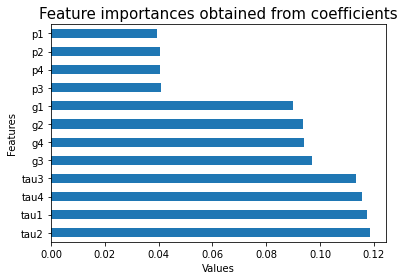

In [ ]:
#Define Extra Trees Classifier model
extra_tree_clf = ExtraTreesClassifier(random_state = 1)
extra_tree_clf.fit(normalised_train_df, y_train)


X = pd.DataFrame(X)

feature_importance = pd.Series(extra_tree_clf.feature_importances_, index = X.columns)
feature_importance.nlargest(40).plot(kind='barh')


plt.title('Feature importances obtained from coefficients', size=15)
plt.ylabel('Features')
plt.xlabel('Values')
plt.show()


In [ ]:
feature_importance

tau1    0.117397
tau2    0.118445
tau3    0.113169
tau4    0.115466
p1      0.039507
p2      0.040371
p3      0.040706
p4      0.040579
g1      0.089783
g2      0.093676
g3      0.096883
g4      0.094019
dtype: float64

The most and least feature important are tau2 and p1 respectively

Question 12: <br>
What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [ ]:
#XGboost

#Define model
xgb_model = XGBClassifier(random_state = 1)

#fit model
xgb_model.fit(normalised_train_df, y_train)

#prediction
xgb_predicted = xgb_model.predict(normalised_test_df)

In [ ]:
#XGBoost accurarcy

xgb_accuracy = accuracy_score(y_test, xgb_predicted)

round(xgb_accuracy, 4)

0.9195

Question 14: <br>
Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [ ]:
#Define Extra Trees Classifier model
param = { 'n_estimators':[50, 100, 300, 500, 1000],
         'min_samples_leaf':[1, 2, 4, 6, 8],
         'max_features':['sqrt', 'log2', 'auto', None],
         'min_samples_split':[2, 3, 5, 7, 9]}
search = RandomizedSearchCV(extra_tree_clf, param, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=1, verbose=1)
result = search.fit(normalised_train_df, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.9241249999999999
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


Question 17: <br>
You are working on a spam classification system using regularized logistic regression. “Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). You have trained your classifier and there are n = 1700 examples in the test set. The confusion matrix of predicted class vs. actual class is: <br>
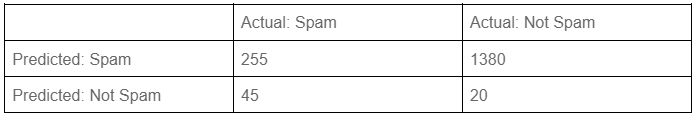 <br>

What is the F1 score of this classifier?

In [ ]:

# confusion matrix given data:
TP = 255
TN = 20
FP = 45
FN = 1380

#Calculate Recall
Recall = TP/(TP+FN)

#Calculate Precision
Precision = TP/(TP+FP)

#Calculate F1 score
F1_Score = (2 * ((Recall*Precision)/(Recall+Precision)))


(round(F1_Score,5))


0.26357

Question 19: <br>
Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [ ]:
#Define model
new_extra_clf = ExtraTreesClassifier(random_state=1)

#fit model
new_extra_clf.fit(normalised_train_df, y_train)

#Predict model
pred = new_extra_clf.predict(normalised_test_df)

In [ ]:
#Let evaluate the accuracy score matrix

acc_new = accuracy_score(pred, y_test)
print(round(acc_new,4))

0.928


In [ ]:
# using the optimal model

#Define model
optimal_extra_clf = ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, max_features = None, random_state=1)

#fit model
optimal_extra_clf.fit(normalised_train_df, y_train)

#Predict model
optimal_pred = optimal_extra_clf.predict(normalised_test_df)

In [ ]:
#Let evaluate the accuracy score matrix of the optimal model

acc_optimal= accuracy_score(optimal_pred, y_test)
print(round(acc_optimal,4))

0.927


The accuracy of the new optimal model is **LOWER** than the initial ExtraTreesClassifier model with no hyperparameter tuning.